# 一步一步构建深层神经网络

参考资料 [【深度学习】神经网络中的权重初始化：Why and How](https://www.jianshu.com/p/03009cfdf733)

## 1 Packages 

- 自动reload： IPython extension to reload modules before executing user code.




```
%load_ext autoreload
%autoreload 2
```

In [121]:
import numpy as np
import h5py 
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### np.max vs np.maximum：前者输出一个序列的最大值（一个值），后者将比较两个序列，输出序列的每个位置都是各自位置上的最大值（一组值）

In [122]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """        
    A=1/(1+np.exp(-Z))
    cache=Z
    return A,cache
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """    
    A=np.maximum(0,Z)
    assert(A.shape==Z.shape)
    cache=A
    return A,cache


def sigmoid_backward(dA,cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """    
    Z=cache
    s=1/(1+np.exp(-Z))
    dZ=dA*s*(1-s)
    assert (dZ.shape==Z.shape)
    return dZ

def relu_backward(dA,cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """    
    Z=cache
    dZ=np.array(dA,copy=True)
    dZ[Z<=0]=0
    assert(dZ.shape==Z.shape)
    return dZ

## 2 DNN outline

<img src ="./my_files/dnn_outline.png" style="width:650px;height:900px;">

## 3 初始化

In [124]:
# 深层神经网络
def initialize_parameters_deep(lay_dims):
    """
    初始化
    
    Parameters
    ----------
    lay_dims : python list 对于L层nn，list长度为L+1

    Returns
    -------
    parameters : 所有参数 
        W1~WL : 权重 (layer_dims[1],layer_dims[1-1])
        b1~bL : bias (layer_dims[1],1) 
            
    """
#     np.random.seed(3)    
    np.random.seed(1)
    parameters={}
    for idx,(n_prev,n) in enumerate(zip(lay_dims[:-1],lay_dims[1:]),1):        
        parameters['W{}'.format(idx)]=np.random.randn(n,n_prev)*0.01
        parameters['b{}'.format(idx)]=np.zeros((n,1))        
    return parameters
    
    



In [32]:

parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


## 4 Forward Propagation

In [125]:
# linaer
def linear_forward(A,W,b):
    """
    linear forward
    

    Parameters
    ----------
    A : 上一层的activation
    W : 权重
    b : bias
    
    Returns
    -------
    Z : pre-activation
    cache : tuple of  A,W,b
        
    """    
    Z=np.matmul(W,A)+b
    assert (Z.shape==(W.shape[0],A.shape[1]))
    cache=(A,W,b)
    return Z,cache

In [36]:

    
    

def linear_forward_test_case():
    np.random.seed(1)
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = np.array([[1]])
    """
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    
    return A, W, b

A, W, b = linear_forward_test_case()
Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))
    
    

Z = [[ 3.26295337 -1.23429987]]


In [126]:
# linear activation
def linear_activation_forward(A_prev,W,b,activation):
    """
    线性激活单元
    
    Parameters
    ----------
    A_prev :上一层激活值
    W : 权重值
    b : bias
    activation: sigmoid or relu

    Returns
    -------
    A : 激活值
    cache: linear_cache,activation_cache            
    """    
    
    if activation=='relu':    
        Z, linear_cache = linear_forward(A_prev, W, b)
        A,activation_cache=relu(Z)
    elif activation=='sigmoid':
        Z, linear_cache = linear_forward(A_prev, W, b)
        A,activation_cache=sigmoid(Z)        
        
    assert (A.shape==(W.shape[0],A_prev.shape[1]))
    cache=(linear_cache,activation_cache)
    return A,cache
    

In [39]:

def linear_activation_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = 5
    """
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    return A_prev, W, b
    
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


#### python 知识点
- `//` 表示返回商的整数部分，抛弃余数


In [127]:

# L层forward模型 L-1层sigmoid 1层relu
def L_model_forward(X,parameters):
    """
    正向传播(L-1线性+Relu，L 线性+Sigmoid)
    

    Parameters
    ----------
    X : 输入
    parameters : 参数 W b L层

    Returns
    -------
    AL : L层激活值
    caches : 每一层的cache(linear+activation)
            
    """
    L=len(parameters)//2
    A_prev=X.copy()
    caches=[]
    for l in range(1,L):
        W=parameters['W{}'.format(l)]
        b=parameters['b{}'.format(l)]
        A_prev,cache=linear_activation_forward(A_prev, W, b, activation = "relu")
        caches.append(cache)
    WL=parameters['W{}'.format(L)]
    bL=parameters['b{}'.format(L)] 
    AL,cache=linear_activation_forward(A_prev, WL, bL, activation = "sigmoid")
    caches.append(cache)
    assert(AL.shape==(1,X.shape[1]))
    return AL,caches
    
        

In [49]:

        

def L_model_forward_test_case_2hidden():
    np.random.seed(6)
    X = np.random.randn(5,4)
    W1 = np.random.randn(4,5)
    b1 = np.random.randn(4,1)
    W2 = np.random.randn(3,4)
    b2 = np.random.randn(3,1)
    W3 = np.random.randn(1,3)
    b3 = np.random.randn(1,1)
  
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return X, parameters

X, parameters=L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))   

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


##  5 Cost function 

In [128]:
def compute_cost(AL,Y):
    """
    计算损失函数
    
    Parameters
    ----------
    AL:  
    Y : 

    Returns
    -------
    cost :         
    """
    m=Y.shape[1]
    cost=-(np.dot(np.log(AL.ravel()),Y.ravel())+np.dot((np.log(1-AL.ravel())),1-Y.ravel()))/m
    
    # dim check
    assert( isinstance(cost,float))
    
    return cost

In [51]:


def compute_cost_test_case():
    Y = np.asarray([[1, 1, 1]])
    aL = np.array([[.8,.9,0.4]])
    
    return Y, aL
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615397


## 6 反向传播


### 6.1 线性反向传播

In [129]:
def linear_backward(dZ,cache):
    """
    线性反向传播
    

    Parameters
    ----------
    dZ : 
    cache : linear cache A,W,b

    Returns
    -------
    dW :
    db :
    dA_prev : 
    """
    A_prev,W,b=cache
    m=A_prev.shape[1]
    
    dW=np.matmul(dZ,A_prev.T)/m
    db=np.sum(dZ,axis=1,keepdims=True)/m
    dA_prev=np.matmul(W.T,dZ)

    assert(dW.shape==(W.shape))
    assert(db.shape==(b.shape))
    assert(dA_prev.shape==A_prev.shape )   
    
    return dA_prev,dW,db
    

In [57]:

    
def linear_backward_test_case():
    """
    z, linear_cache = (np.array([[-0.8019545 ,  3.85763489]]), (np.array([[-1.02387576,  1.12397796],
       [-1.62328545,  0.64667545],
       [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), np.array([[1]]))
    """
    np.random.seed(1)
    dZ = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    linear_cache = (A, W, b)
    return dZ, linear_cache        
        
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))
    

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


## 6.2 线性激活函数传播

In [130]:
def linear_activation_backward(dA,cache,activation):
    """
    反向传播
    

    Parameters
    ----------
    dA :
    cache: activation_cache,linear_cache
    activation: relu sigmoid

    Returns
    -------
    dW :
    db :
    dA_prev : 
        
    """
    linear_cache,activation_cache=cache
    if activation=='relu':
        dZ=relu_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    elif activation=='sigmoid':
        dZ=sigmoid_backward(dA,activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)        
    return dA_prev, dW, db

In [61]:

    
def linear_activation_backward_test_case():
    """
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    """
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)
    
    return dA, linear_activation_cache

dAL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))
    
    
    
    
    
    

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


### 6.3 L-model backward

#### dAL 的求导公式：注意 不是dZ,而应该是 似然损失函数的求导

In [131]:
def L_model_backward(AL,Y,caches):
    """
    backward propagation

    Parameters
    ----------
    AL : L层激活值
    Y : 
    caches : 每一层的cache(linear+activation)

    Returns
    -------
    grads: dA dW db 
    """
    L=len(caches)
    grads={}
        
    dAL=-np.divide(Y,AL)+np.divide(1-Y,1-AL)
    grads["dA{}".format(L)]=dAL
    current_cache=caches[-1]    
    grads["dA{}".format(L-1)], grads['dW{}'.format(L)],grads['db{}'.format(L)]=linear_activation_backward(dAL, current_cache, activation = "sigmoid")

    for l in reversed(range(1,L)):          
        current_cache=caches[l-1]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA{}".format(l)], current_cache, activation = "relu")    
        grads["dA{}".format(l-1)]=dA_prev_temp        
        grads['dW{}'.format(l)]=dW_temp
        grads['db{}'.format(l)]=db_temp           
    return grads
    
    

In [75]:


def L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}

    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches    
    
    
def print_grads(grads):
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dA1 = "+ str(grads["dA1"]))     
    
    
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)    


dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


### 6.4 更新参数

In [132]:

def update_parameters(parameters,grads,learning_rate):
    """
    参数更新
    

    Parameters
    ----------
    parameters : 所有参数 
        W1~WL : 权重 (layer_dims[1],layer_dims[1-1])
        b1~bL : bias (layer_dims[1],1) 
    grads: dA dW db 

    Returns
    -------
    parameters : 所有参数 
        W1~WL : 权重 (layer_dims[1],layer_dims[1-1])
        b1~bL : bias (layer_dims[1],1) 

    """    
    L=len(parameters)//2
    for l in range(1,L+1):
        W_temp,b_temp=parameters['W{}'.format(l)],parameters['b{}'.format(l)]        
        dW_temp,db_temp=grads['dW{}'.format(l)],grads['db{}'.format(l)]        
        parameters['W{}'.format(l)],parameters['b{}'.format(l)]=W_temp-learning_rate*dW_temp,b_temp-learning_rate*db_temp
    return parameters

In [86]:


def update_parameters_test_case():
    """
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747],
        [-1.8634927 , -0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068, -0.04381817],
        [-0.47721803, -1.31386475,  0.88462238]]),
 'W2': np.array([[ 0.88131804,  1.70957306,  0.05003364, -0.40467741],
        [-0.54535995, -1.54647732,  0.98236743, -1.10106763],
        [-1.18504653, -0.2056499 ,  1.48614836,  0.23671627]]),
 'W3': np.array([[-1.02378514, -0.7129932 ,  0.62524497],
        [-0.16051336, -0.76883635, -0.23003072]]),
 'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.],
        [ 0.],
        [ 0.]]),
 'b3': np.array([[ 0.],
        [ 0.]])}
    grads = {'dW1': np.array([[ 0.63070583,  0.66482653,  0.18308507],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 'dW2': np.array([[ 1.62934255,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 'dW3': np.array([[-1.40260776,  0.        ,  0.        ]]),
 'da1': np.array([[ 0.70760786,  0.65063504],
        [ 0.17268975,  0.15878569],
        [ 0.03817582,  0.03510211]]),
 'da2': np.array([[ 0.39561478,  0.36376198],
        [ 0.7674101 ,  0.70562233],
        [ 0.0224596 ,  0.02065127],
        [-0.18165561, -0.16702967]]),
 'da3': np.array([[ 0.44888991,  0.41274769],
        [ 0.31261975,  0.28744927],
        [-0.27414557, -0.25207283]]),
 'db1': 0.75937676204411464,
 'db2': 0.86163759922811056,
 'db3': -0.84161956022334572}
    """
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return parameters, grads
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


# 构建深度神经网络应用

## 2 Dataset

In [133]:
def load_data():
    train_dataset = h5py.File('../Deep Neural Network Application: Image Classification/datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('../Deep Neural Network Application: Image Classification/datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.
Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


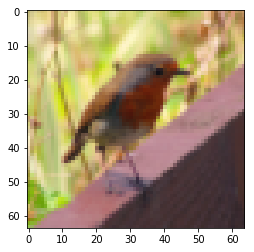

In [134]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

In [135]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## 两层网络模型

#### 出现问题，多层数多于2层时，误差率停止下降了:
    - 【排除原因】有可能还是全局变量的问题，要想办法进行避免：函数内部变量与外部变量要进行隔离
    - 【定位原因】 初始化导致，不能再用统一的0.01进行初始化，要进行处理；一个检验方法就是 检查初始化权重的期望和方差

In [174]:
# 深层神经网络（系数进行处理 目的是为了下一层的输入值方差为1）
def initialize_parameters_deep(lay_dims):
    """
    初始化
    
    Parameters
    ----------
    lay_dims : python list 对于L层nn，list长度为L+1

    Returns
    -------
    parameters : 所有参数 
        W1~WL : 权重 (layer_dims[1],layer_dims[1-1])
        b1~bL : bias (layer_dims[1],1) 
            
    """
#     np.random.seed(3)    
    np.random.seed(1)
    parameters={}
    for idx,(n_prev,n) in enumerate(zip(lay_dims[:-1],lay_dims[1:]),1):        
        parameters['W{}'.format(idx)]=np.random.randn(n,n_prev)/np.sqrt(n_prev)
        parameters['b{}'.format(idx)]=np.zeros((n,1))        
    return parameters
    


In [19]:
n_x=12288
n_h=7
n_y=1
layers_dim=(n_x,n_h,n_y)

In [175]:
def L_layer_model(X,y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
    """
            
    组成模型
    
    Parameters
    ----------
    X: input data
    Y :真实值
    learning_rate: 学习率
    layers_dims : 参数
    num_iterations： 循环次数
    print_cost : 是否打印cost

    Returns
    -------
    parameters :  dict形式
        W1 (n_h,n_x)
        b1 (n_h,1)
        W2 (n_y,n_h)
        b2 (n_y,1) 
    costs:  
    
            
    """     
    
    np.random.seed(1)
    
    #     参数初始化
    parameters = initialize_parameters_deep(layers_dims)
    #     循环
    costs=[]
    for i in range(num_iterations):
        #         正向传播
        AL,caches=L_model_forward(X,parameters)    
        #         反向传播
        grads=L_model_backward(AL, y, caches)        
        #         参数更新
        parameters=update_parameters(parameters,grads,learning_rate) 
        
        #  计算损失函数 
        if( i%100==0) :        
            cost=compute_cost(AL,y)
            costs.append(cost)
            if( i%100==0) and( print_cost==True):
                print("cost after {} iterations, cost={}".format(i,cost))
    plt.plot(np.squeeze(costs))
    plt.xlabel("cost")
    plt.ylabel("iterations per hundred")
    plt.title("learnint rate={}".format(learning_rate))
    plt.show()
    
    return parameters,costs


cost after 0 iterations, cost=0.7717493284237686
cost after 100 iterations, cost=0.6720534400822914
cost after 200 iterations, cost=0.6482632048575212
cost after 300 iterations, cost=0.6115068816101354
cost after 400 iterations, cost=0.5670473268366112
cost after 500 iterations, cost=0.5401376634547801
cost after 600 iterations, cost=0.5279299569455267
cost after 700 iterations, cost=0.4654773771766851
cost after 800 iterations, cost=0.3691258524959279
cost after 900 iterations, cost=0.39174697434805356
cost after 1000 iterations, cost=0.31518698886006163
cost after 1100 iterations, cost=0.2726998441789385
cost after 1200 iterations, cost=0.23741853400268137
cost after 1300 iterations, cost=0.19960120532208647
cost after 1400 iterations, cost=0.18926300388463305
cost after 1500 iterations, cost=0.1611885466582775
cost after 1600 iterations, cost=0.14821389662363316
cost after 1700 iterations, cost=0.13777487812972944
cost after 1800 iterations, cost=0.1297401754919012
cost after 1900 i

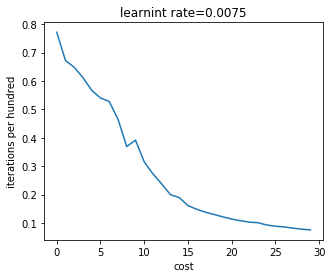

In [179]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
parameters,costs = L_layer_model(train_x, train_y, layers_dims = layers_dims,learning_rate=0.0075, num_iterations = 3000, print_cost=True)        


In [181]:
def predict(X,y,parameters):
    """
    预测
    
    Parameters
    ----------
    X : 
    y : 
    parameters: 模型参数

    Returns
    -------
    y_hat : 预测值            
    """
    m=y.shape[1]
    AL,caches=L_model_forward(X,parameters)
    y_hat=(AL>0.5)
    print("accuracy={:,.2%}".format(np.sum(y_hat==y)/m))
    
    return y_hat
    

In [184]:
prediction_train=predict(train_x,train_y,parameters)
prediction_test=predict(test_x,test_y,parameters)

accuracy=99.04%
accuracy=82.00%


In [185]:
def print_mislabeled_images(classes,X,y,p):
    
#     a=p+y
#     mislabled_indexes=np.asarray(np.where(a==1))
#     plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots    
#     num_images=len(mislabled_indexes[0])
#     for i in range(num_images):
#         index=mislabled_indexes[1][i]
#         plt.subplot(2,num_images,i+1)
#         plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
#         plt.axis('off')
#         plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))        
        
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))
        
    
    
    

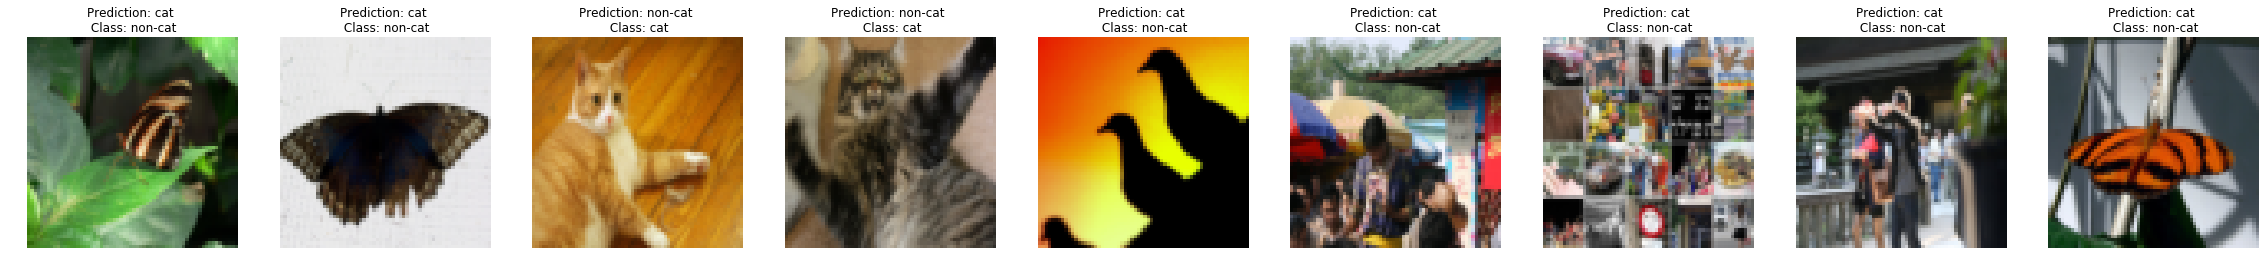

In [186]:
print_mislabeled_images(classes, test_x, test_y, prediction_test)

## 拓展 神经网络中的权重初始化：Why and How

在学习过程中，发现权重初始化对结果影响非常大，现在予以探索分析。

参考资料 [【深度学习】神经网络中的权重初始化：Why and How](https://www.jianshu.com/p/03009cfdf733)

In [194]:
print(train_x.shape)

(12288, 209)


In [191]:
train_x.mean()

0.40394951382292327

In [204]:
train_x.std()

0.2632300743951364

In [206]:
n_prev=train_x.shape[0]
n_next=100
W=np.random.rand(n_next,n_prev)
Z1=np.matmul(W,train_x)
plt.plot(kind='hist',np.squeeze(W))
print(Z1.std(),Z1.mean())
W=np.random.rand(n_next,n_prev)/np.sqrt(12288)
Z1=np.matmul(W,train_x)
print(Z1.std(),Z1.mean())


745.5631027642584 2482.250202261762
6.7216755334696074 22.387937541033068


In [207]:
n_prev=train_x.shape[0]
n_next=10
W=np.random.rand(n_next,n_prev)
Z1=np.matmul(W,train_x)
print(Z1.std(),Z1.mean())
W=np.random.rand(n_next,n_prev)/np.sqrt(12288)
Z1=np.matmul(W,train_x)
print(Z1.std(),Z1.mean())

743.3998002503545 2475.0704637114386
6.732520980325034 22.41436893648117


In [213]:
# 结论： 如果方差不为1 或者均值不为0，那么一直处于饱和状态，这也解释了为什么之前数据一直不收敛的情况。

In [214]:
pwd

'/Users/pengju/python-workspace/deep-learning-coursera-full/Neural Networks and Deep Learning/Week 4/Building your Deep Neural Network - Step by Step'